# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color=green>2 TESTES DE HIPÓTESES</font>
***

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## <font color=green>2.1 Teste de normalidade</font>
***

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [4]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

### Definindo a significância do teste ($\alpha$)

In [5]:
significancia = 0.05

### Testando a variável Renda

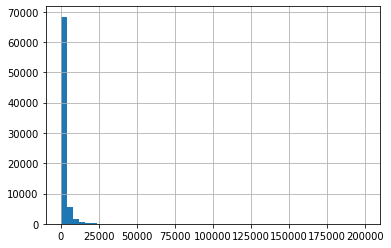

In [6]:
dados.Renda.hist(bins=50)

In [7]:
normaltest(dados.Renda)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [8]:
stat_test, p_valor = normaltest(dados.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [9]:
p_valor <= significancia

True

### Testando a variável Altura

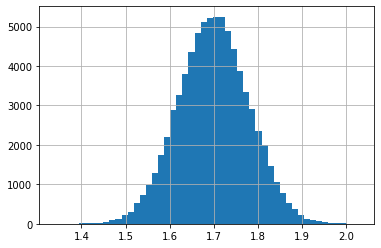

In [10]:
dados.Altura.hist(bins=50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [11]:
stat_test, p_valor = normaltest(dados.Altura)
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


In [12]:
p_valor <= significancia

False

## <font color=green>2.2 Etapas Básicas de um Teste</font>
***

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# <font color=green>3 TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

## <font color=green>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [13]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [14]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


O próximo passo é calcular a média dessa amostra que eu estou chamando de média amostra.

In [15]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

O 503.24 é dado no enunciado do problema. Outra coisa que não foi passada no problema é o desvio padrão da população (sigma). Tendo a amostra, calculamos o desvio padrão da amostra (S).

In [16]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

4.48380305052735

Nós utilizaremos esses valores para calcular as estatísticas de teste. O restante dos dados do problema são a média, que é justamente o 500 ml que estamos testando. A significância foi dada como 5%, portanto, 0.05. E confiança é igual a 1 menos a significância. O n, de acordo com o que foi dado no problema, é uma amostra de tamanho 50. Já temos todos esses dados e podemos rodar.

In [17]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

O primeiro passo é a formulação das hipóteses H0 e H1, que são, respectivamente, hipótese nula e hipótese alternativa. É importante lembrar sempre que a igualdade deve estar na hipótese nula, que é o nosso caso. O nosso problema fala qual é a hipótese, ele está testando se mi, que é a média, é igual a 500 contra a hipótese alternativa contrária, de que mi é diferente de 500.

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

---

Nesse tipo de teste, estamos testando a igualdade e não importa se ele vai ser menor ou maior que a média. O que nos importa, de fato, é a igualdade, por isso estamos usando o teste bicaudal. Haverá sempre algum problema: se for para cima, é problemático; se for para baixo, também é. O segundo passo é: tendo as hipóteses já formuladas, precisamos escolher a distribuição que utilizaremos para comparar o valor crítico.

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

Para pensar essas questões, temos um esquema que já havíamos estudado no vídeo anterior. Nele são apresentadas algumas perguntas que vamos respondendo e chegando até a distribuição que desejamos utilizar.

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional (sigma) é conhecido?
#### Resp.: Não

Pensando no nosso caso, n é maior que 30? Sim, pois n é igual a 50. A próxima pergunta é: sigma é conhecido? Ele não falou sobre isso no problema, não falou qual é o desvio padrão da população (sigma), então, a resposta é não, não é conhecido. Chegamos ao ponto onde temos que usar o z, que é a normal padrão e nós já aprendemos a calcular as probabilidades.

E o s, que é o desvio padrão da amostra, que também já calculamos mais acima com o nome de desvio_padrao_amostra. Com esse passo concluído, já sabemos o que precisamos fazer: a fixação da significância do teste alfa que, no caso, é 5%. Vamos calcular para obter, justamente, um valor que já conhecemos dos cursos anteriores, o 1,96. Precisamos do z para comparar com o valor crítico.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [18]:
from scipy.stats import norm

In [19]:
probabilidade = (0.5 + (confianca)/2)
probabilidade

0.975

Acima estamos importando from scipy.stats import norm. Isso nós já estamos acostumados a fazer. Outra coisa que faremos para calcular a estatística é o probabilidade = (0.5 + (confianca)/2)), considerando que a confiança é de 95% e dividiremos por dois. Como resultado, teremos um valor de 0.975.

### Obtendo $z_{\alpha/2}$

A ferramenta do Python que estamos utilizando fornece a área sobre a curva de determinado ponto até o final, até o menos infinito, ou seja, queremos a área a partir da linha pontilhada à direita da imagem (+1,96), até o menos infinito, na direção esquerda da curva, isto é, da direita para a esquerda. Desta maneira, descobriremos o valor de z.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

O 0,975 corresponde ao 95% (que é o nível de confiança) mais o 2,5% (que é metade do nível de significância). Se somarmos 95 com 2,5, teremos 0,975. É esse valor que usaremos para achar o que chamaremos de z alfa sobre dois.

In [20]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

Como o teste é bicaudal, e essa é uma função simétrica, temos na cauda direita 1,96 e na esquerda -1,96. Está determinada a nossa área de aceitação (o centro da cauda) do teste e de rejeição, que são as caudas. O que precisamos agora é calcular o valor crítico, o valor z do teste e posicioná-lo nessas áreas para, então, aceitarmos ou rejeitarmos a hipótese nula que estamos testando. O passo 4 é justamente calcular essa estatística.

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

O cálculo é: z é igual a x barra (média da amostra)menos mi zero (média que estamos testando = 500ml), dividido por s (desvio padrão da amostra), sobre raiz de n.

In [21]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991873

O z será igual a 5,11. Arrendodando 5,1095 para 5,11. É essa estastítica que jogaremos na cauda direita do gráfico. Fiz um desenho para facilitar a nossa vida, é o gráfico anterior com o nosso z = 5,11 comparado com o z alfa sobre dois que é o 1,96.

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

Se a área central é a área de aceitação, a cauda direita será a de rejeição da hipótese nula. Ou seja, estamos rejeitando a hipótese de que a média é igual a 500, ao nível de significância de 5%. O passo 5 é justamente esse que já concluímos de forma simples: aceitação ou rejeição da hipótese nula.

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

As hipóteses que formulamos são duas: média igual e média diferente (bicaudal). Em seguida, temos as estatísticas de teste que vamos utilizar. Depois, as regras de rejeição de H0. A primeira regra que estamos usando (pois a amostra é maior que 30), é a do valor crítico z, ou seja, no caso do nosso teste, nós rejeitamos H0 se z, que é a nossa estatística, for menor ou igual a menos z alfa sobre dois (aquele que calculamos mais acima, que é 1,96), ou se z for maior ou igual a z alfa sobre dois. Nós já fizemos visualmente, mas vamos escrever, como se fosse uma pergunta "z é menor ou igual a menos z alfa sobre dois?".

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [22]:
z <= -z_alpha_2

False

Ele vai dizer que não, ou seja, falso. "Mas e z é maior ou igual a z alfa sobre dois?", essa é a segunda pergunta.

In [23]:
z >= z_alpha_2

True

Ou seja, quando temos uma resposta True, significa que precisamos rejeitar a hipótese nula. Isso são regras de rejeição de H0.

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

Nós rejeitamos H0 se P valor for menor do que Alfa. Alfa que é o nosso nível de significância. Geralmente, a gente ouve falar: é menor que 0,5.

Isso quando o nível de significância é de 5%. Se for 1%, ele tem que ser menor do que 0,01.

O que é o P valor? O P valor é justamente a probabilidade do valor crítico cair dentro da area de rejeição.

O que está querendo dizer aquele teste? Que se a área do ponto crítico for menor que a de significância, quer dizer que minha estatística está dentro da região de rejeição. Ou seja, quando o P valor é menor do que Alfa, eu rejeito H0.

É apenas outra forma, mais simples, pois todo software estatístico vai soltar para você, nos testes estatisticos, o P valor. E aí você já tem na sua cabeça que essa regra é uma das regras de rejeição da hipótese nula.

Vamos calcular o P valor e vamos ver se ele concorda também com essa decisão que a gente tomou anteriormente:

In [24]:
p_valor = 2 * (1 - norm.cdf(z))  # duas vezes apenas no teste bicaudal.
p_valor

3.2291031715203644e-07

O meu P valor é bem pequeno, não é? Tem um monte de zeros até chegar ao 3,22. Aqui eu já deixei uma situação formada, que é aquela pergunta: o P valor é menor ou igual a significância? Que é 0,05?

In [25]:
p_valor <= significancia

True

Eu já consigo responder que é. Se é, eu rejeito H0, foi a conclusão que chegamos anteriormente.

Aqui temos outra forma, utilizando outro recurso do norm:

In [26]:
p_valor = 2 * (norm.sf(z))  # duas vezes apenas no teste bicaudal.
p_valor

3.229103172445771e-07

Temos uma diferencinha aqui. A documentação diz que usando o SF, é um pouco mais preciso. Esta precisão nao irá nos atrapalhar aqui.

**Como é que a gente faz isso utilizando o Python?**

Primeiramente iremos utilizar o método statsmodels.stats.weightstats.ztest. Usaremos o ztest, que é justamente o que estamos fazendo, um teste Z:

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [27]:
# from statsmodels.stats.weightstats.ztest import ztest
from statsmodels.stats import weightstats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Chamo o ztest e passo para ele o x1 igual a amostra, que é uma amostra que a gente selecionou, está lá em cima aquele Dataframe. Passo também value, que é a média que eu estou testando (aqueles 500 ml). Ele vai devolver duas saídas:

In [28]:
weightstats.ztest(x1=amostra, value=media)

(array([5.10955978]), array([3.22910317e-07]))

Uma vai ser a estatística de teste, que é o 5,11 que a gente calculou, e o outro é o P valor, muito semelhante ao anterior.

Outro teste que eu quero mostrar para vocês é o DescrStatsW:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [29]:
from statsmodels.stats.weightstats import DescrStatsW

Para usar essa ferramenta temos que instanciar em uma variavel chamada test. Vou criar um objeto do tipo DescrStatsW() e vou passar para ele a minha amostra:

In [30]:
test = DescrStatsW(amostra)

Com esse objeto teste, eu vou realizar o teste ztest_mean: Pego o test.ztest_mean(), passo para ele o value, que é igual a média:

In [31]:
test.ztest_mean(value = media)

(array([5.10955978]), array([3.22910317e-07]))

Por que eu estou passando só o value? Lembra que eu criei um objeto com a amostra? Ele já tem os meus dados. Realizaremos um teste nesses dados. E ele vai, similar ao de cima, devolver a estatística de teste e o meu P valor.

Removendo de dentro do array:

In [32]:
z, p_valor = test.ztest_mean(value=media)
print(f'z = {z[0].round(4)}')
print(f'p_valor = {p_valor[0].round(4)}')

z = 5.1096
p_valor = 0.0


mais uma coisa antes de finalizarmos. Eu não configurei nada sobre ele ser bicaudal ou unicaudal. Por quê? Esses outros tipos de testes, que encontramos na página do DescrStats, essa hipótese Alternative pode dizer two-sided.

[8:14] Ou seja, ele já vem com padrão bicaudal. No próximo vídeo, vamos estudar o unicaudal e vamos alterar essa opção.

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

[0:20] Ou seja, ele já deu a hipótese nula, a igualdade está ali. E reparem, também está no material de estudo de vocês que, geralmente, a hipótese que estamos testando fica configurada como a hipótese alternativa. No caso, eu estou testando se a alegação do fabricante é verdade ou mentira. Eu acho que tem mais de 37 gramas. É isso que eu vou testar.

### Construindo tabela $t$ de Student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [33]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index = [i for i in range(1,31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for colum in tabela_t_student.columns:
        tabela_t_student.loc[index, colum] = t_student.ppf(1 -float(colum) / 2, index)

index = [('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i/ 100), "{0:0.3f}".format(i/ 100 / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

---

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

[1:31] O fabricante está alegando que é no máximo 37, então o problema está em passar daquele valor. Aqui no outro é o contrário. Perfeito? Então vamos lá.

[1:41] Os dados do problema estão aqui, do mesmo jeito que a gente fez no outro. Então, vamos rodar. Temos as 25 latinhas selecionadas no supermercado para as medições de açúcar.

In [34]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [35]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


Eu vou calcular a média amostral(x_barra), que é 36,25.

In [36]:
media_amostra_x_barra = amostra.mean()[0]
media_amostra_x_barra

36.2504

[2:06] Também vou calcular o desvio padrão da amostra(S), porque não foi dado o desvio padrão da população(sigma). Tenho que pegar a amostra e calcular o desvio padrão para obter a estatística de teste.

In [37]:
desvio_padrao_amostra_s = amostra.std()[0]
desvio_padrao_amostra_s

0.9667535018469455

[2:15] A seguir, o procedimento é basicamente o mesmo que a gente fez antes. Novamente, a média aqui é 37, é o que o fabricante está alegando e o que a gente está testando.

[2:28] Significância é 5%. Confiança é 1 menos a significância. O n é 25 latinhas que foram selecionadas. Agora vamos utilizar os graus de liberdade, porque estamos utilizando o t de Student.

[2:40] A gente sabe que grau de liberdade é igual a n - 1. Ou seja, 25 menos um, 24.

In [38]:
media = 37  # gramas de acucar
significancia = 0.05
confianca = 1 - significancia
n = 25  # latinhas
graus_de_liberdade = n - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

O fabricante está falando qu refrigerante dele tem no máximo 37. Ou seja, pode ter um pouco menos, mas não passa de 37, segundo ele. Ele está afirmando isso. O H1 que a gente está testando aqui é que a média é maior que 37.

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

[3:37] Está aqui tudo certinho. Vamos lá. Vamos achar o valor crítico ali, o t alfa.

[3:44] Alfa por quê? Antes a gente fez o z alfa sobre dois porque era bicaudal, a gente tem que dividir o alfa em duas partes, é simétrica.

[3:51] Agora não, o alfa está de um lado só, por isso eu vou chamar de t, porque a gente está usando o t de Student, alfa.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [39]:
from scipy.stats import t as t_student  # t_student é o apelido dado pelo professor pra evitar conflito com variavel t

In [40]:
tabela_t_student[22:25]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436

4:37] Ou seja, 24 é o grau de liberdade que eu estou interessado. Eu tenho um teste unicaudal. E o que eu tenho que fazer? Verificar, na minha tabela, a linha unicaudal. Qual é o nível de significância? 5%, isto é, 0,05.

[5:02] O meu grau de liberdade está aqui, então o meu t vai ser 1,71088. Perfeito? É isso. Na tabela eu já resolvi esse problema. Está aqui: 1,71088.

[5:13] Mas tem como a gente fazer isso também utilizando o nosso amigo Python, com t_alpha, lembrando que não tem mais o alfa sobre dois. Vai ser igual. Aí eu chamo t_student, do mesmo jeito que a gente faz com a normal, .ppf. Só que aqui eu passo a confiança. Já vou explicar porque. E também graus_de_liberdade que a gente já rodou.

### Obtendo $t_{\alpha}$

In [41]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

[6:14] Então, vamos lá. t alfa é igual a 1,71. E já está desenhado aqui, já definimos a área de rejeição e a área de aceitação, ok?

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

[6:26] Cálculos da estatística de teste: exatamente igual fizemos no vídeo anterior. Só que aqui eu vou chamar ele de t. E t vai ser igual a, primeiro, media_amostra menos a media.

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [42]:
t = (media_amostra_x_barra - media) / (desvio_padrao_amostra_s / np.sqrt(n))
t

-3.876893119952081

[7:03] Eu vou ter um t de menos 3,876. Eu arredondei isso para menos 3,88. Já percebemos que ele está na área de aceitação de H0.

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

[7:20] Ou seja, o nosso problema de teste de hipóteses já está resolvido visualmente. Mas vamos supor que a gente não tenha esse recurso gráfico e queremos ter certeza.

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

[7:28] Vamos até o unicaudal superior, esse é o passo cinco. Unicaudal superior; aqui onde estão as hipóteses, igual a nossa. A gente obteve uma determinada estatística.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

Esse é o crítico aqui para o t: rejeitar o H0 se t, que é a estatística que a gente calculou, esse - 3,88, é maior ou igual. A pergunta é: t, você é maior ou igual a t Alfa?

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [43]:
t >= t_alpha

False

Ele vai dizer que não, que é falso. Ou seja, eu não posso rejeitar H0. Já concluo que o fabricante não está mentindo.

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

[8:27] Lógico, baseado na amostra que eu selecionei e nesse nível de confiança, ou nível de significância.

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

Já concluímos o nosso teste unicaudal superior e verificamos que não podemos rejeitar H0 a um nível de significância de 5%.

Vamos fazer esse mesmo teste utilizando agora o critério do p valor, como a gente fez anteriormente.

Primeiro eu vou chamar o t, que é a estatística que a gente calculou. E vou mostrar como fazer isso utilizando o t de Student também.

Essa é outra diferença do nosso teste, além de ser unicaudal, a gente utilizou o t de Student. A forma é exatamente igual a da normal.

vou usar apenas o SF, não vou usar o CDF, mas se você quiser testar, o CDF é exatamente igual ao da normal que fizemos anteriormente. Só que a gente não tem que multiplicar por dois, porque estamos fazendo um teste unicaudal.

O p_valor vai ser igual a t_student.sf, passando o t, que é a probabilidade. Queremos daquele ponto, a linha pontilhada, para baixo do t.

Tenho que passar os graus de liberdade também. A gente está trabalhando com o t de Student. O parâmetro é df = 24.

In [44]:
p_valor = t_student.sf(t, df=24)
p_valor

0.9996406170303819

É um valor bem alto. O certo é que esse valor seja bem pequeno. O critério é o que o p valor tem que ser menor ou igual ao nível de significância.

Visivelmente, já percebemos que não é. Testando aqui, p_valor é menor ou igual a significância? Deu falso, confirmando o que a gente já tinha percebido anteriormente:

In [45]:
p_valor <= significancia

False

Agora eu vou mostrar para você como fazer um Ttest utilizando o Statsmodels, assim como fizemos com o Ztest.

Importei a mesma biblioteca que importamos no Ztest, statsmodels.stats.wheightstats import DescrStatsW. E aqui eu tenho que fazer aquele mesmo recurso, que é chamar o objeto de test novamente:

In [46]:
from statsmodels.stats.weightstats import DescrStatsW

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [47]:
test = DescrStatsW(amostra)

Usaremos o o ttest_mean. Passamos para ele o value, que é igual a media, que é o 37 que estamos testando. Aqui eu preciso passar um parâmetro aqui que é o alternative. Por quê?

Por padrão, ele está como bicaudal e eu preciso de um teste unicaudal superior. Aqui temos as opções: two-sided para o bicaudal, larger para o unicaudal superior, é o que a gente vai usar, e o smaller para o inferior.

In [48]:
test.ttest_mean(value=media, alternative='larger')

(array([-3.87689312]), array([0.99964062]), 24.0)

Ele devolve três valores: estatística de teste, o p valor e o grau de liberdade (df).

In [49]:
t, p_valor, df = test.ttest_mean(value=media, alternative='larger')
print(f't = {t[0]}')
print(f'p_valor = {p_valor[0]}')
print(f'DF = {df}')

t = -3.8768931199520447
p_valor = 0.9996406170303819
DF = 24.0


agora testamos:

In [50]:
p_valor[0] <= significancia

False

Falso novamente, ou seja, não podemos rejeitar H0.

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [51]:
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda

In [52]:
mulheres = dados.query('Sexo == 1').sample(n = 500, random_state = 101).Renda

### Dados do problema

In [53]:
media_amostra_M_xbarra = mulheres.mean()
media_amostra_M_xbarra

1357.528

In [54]:
desvio_padrao_amostra_M_S = mulheres.std()
desvio_padrao_amostra_M_S

1569.901190748458

In [55]:
media_amostra_H_xbarra = homens.mean()
media_amostra_H_xbarra

2142.608

In [56]:
desvio_padrao_amostra_H_S = homens.std()
desvio_padrao_amostra_H_S

2548.0508024998717

[2:47] O D_0, eu vou deixar como um mistério, mas é a diferença entre os dois, das duas médias que eu estou testando.

[3:01] Eu vou dizer que está como zero, porque eu estou testando justamente essa igualdade, quero saber se elas são iguais.

[3:11] Agora, a gente vem com a formulação das hipóteses:

[3:17] Lembra que eu falei que geralmente o que a gente está testando é o que colocamos na hipótese alternativa:
H0: mi1 menor igual a mi2; H1: mi1 maior que mi2

Mi1: média dos H e o Mi2: média das rendas dos chefes de domicílios do sexo feminino.

[3:32] Eu estou desconfiado que a média dos homens é maior do que a média das mulheres e vou testar isso. Sobre o H0, no problema já foi dito que era para eu testar se era igual. Se elas são iguais, ou então, se a dos homens é menor.

[3:46] Então, eu tenho a hipótese nula que é: Mi1, a média dos homens, menor ou igual a média das mulheres, contra: a média dos homens ser maior que a média das mulheres.

[3:56] Esse é um meio de analisar os testes. Você pode perceber que estou querendo dizer que Mi1 - Mi2 <= 0:


H0: Mi1 <= Mi2

H1: Mi1 > Mi2



H0: Mi1 - Mi <= 0 

H1: Mi1 - Mi2 > 0


[4:08] Por isso, o D_0 é igual a zero. A diferença entre as médias que eu estou testando é que elas não tenham diferença, é zero. Perfeito? Isso aqui pode ser um outro valor, dez, 20, 100 e por aí vai.

[4:19] Depende do teste que você está realizando. Depois, a mesma coisa: só passamos esse Mi2 passa o lado direito da desigualdade. Ele vem com o sinal negativo.

[4:29] Mi1 - Mi2 > 0, essa é a minha hipótese.

[4:35] O segundo passo é a escolha da distribuição. Algo importante que eu queria falar para vocês, é: como estamos trabalhando com duas amostras, quando a gente estiver usando a t de Student, o grau de liberdade precisa ser a soma das duas (quantidade de observações da primeira amostra com a quantidade de observações da segunda amostra) menos dois.

[4:58] O resultado vai ser o número de graus de liberdade que você vai consultar na sua tabela. Então, lembra disso, a fórmula é: **(n1 + n2) - 2**, está bem?

In [57]:
significancia = 0.01  # pra confiança de 99%
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0 # diferença entre as duas medias (mis) que estamos testando

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'>Observação importante</font>
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [58]:
probabilidade = confianca
probabilidade

0.99

In [59]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [60]:
numerador = (media_amostra_H_xbarra - media_amostra_M_xbarra) - (D_0)

denominador = np.sqrt((desvio_padrao_amostra_H_S ** 2 / n_H) + (desvio_padrao_amostra_M_S ** 2 / n_M))

z = numerador / denominador
z.round(2)

5.87

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [61]:
z >= z_alpha  # rejeitamos H0

True

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [62]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [63]:
test_H = DescrStatsW(homens)

In [64]:
test_M = DescrStatsW(mulheres)

In [65]:
test = test_H.get_compare(test_M)

In [66]:
z, p_valor = test.ztest_ind(alternative='larger', value=0)  # larger pois é cauda superior, value=0 pois D=0 

In [67]:
print(f'Z = {z.round(2)}')
print(f'P_valor = {p_valor.round(2)}')

Z = 5.87
P_valor = 0.0


In [68]:
p_valor <= significancia

True

### Usando CompareMeans

In [69]:
test = CompareMeans(test_H, test_M)
test = test_H.get_compare(test_M)
z, p_valor = test.ztest_ind(alternative='larger', value=0)
p_valor

2.2372867859458255e-09

In [70]:
p_valor <= significancia

True

---

# <font color=green>4 TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

## <font color=green>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

### Construindo tabela $\chi^2$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [71]:
import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [72]:
F_observada = [17, 33]  # segundo a tabela do problema
F_esperada = [25, 25]  # segundo vozes da minha cabeça
significancia = 0.05
confianca = 1 - significancia
k = 2  # número de eventos possiveis (ou cara, ou coroa)
graus_de_liberdade = k - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [73]:
from scipy.stats import chi

In [74]:
# pegando valor da tabelinha de modo direto:

chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2  # chi quadrado entao **2
chi_2_alpha

3.8414588206941245

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

### Obtendo $\chi_{\alpha}^2$

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [75]:
chi_2 = ( (F_observada[0] - F_esperada[0]) ** 2 /  F_esperada[0] ) + ( (F_observada[1] - F_esperada[1]) ** 2 /  F_esperada[1] )
chi_2

5,12 

(5, 12)

Outra forma, mais elegante pra caso numero k maior:

In [76]:
chi_2 = 0  # inicia a variavel pro loop4

for i in range(k):  # loop4 pra fazer o somatório da equação para a quantidade de k
  chi_2 += (F_observada[i] - F_esperada[i]) ** 2 / F_esperada[i]

chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [77]:
chi_2 > chi_2_alpha

True

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

Para lembrar:

1) O teste não paramétrico do Qui-quadrado é também conhecido como teste de adequação do ajustamento

2) O teste do Qui-quadrado testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [78]:
# # relembrando... de algumas celulas acima como conseguimos o chi_2:

# chi_2 = 0  # inicia a variavel pro loop4

# for i in range(k):  # loop4 pra fazer o somatório da equação para a quantidade de k
#   chi_2 += (F_observada[i] - F_esperada[i]) ** 2 / F_esperada[i]

# chi_2

In [79]:
raiz_chi_2 = np.sqrt(chi_2)  # chi_2 é a estatistica teste
raiz_chi_2

2.262741699796952

In [80]:
p_valor = chi.sf(raiz_chi_2, df=1)  # df é o graus de liberdade

In [81]:
p_valor

0.023651616655355978

In [82]:
p_valor <= significancia

True

True, ou seja, rejeitamos H0, a mesma conclusão que a gente chegou fazendo com o critério do valor crítico.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [83]:
from scipy.stats import chisquare

In [84]:
chi_2, p_valor = chisquare(f_obs=F_observada, f_exp=F_esperada)
print(chi_2)
print(p_valor)

5.12
0.023651616655356


In [85]:
p_valor <= significancia

True

---

## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [86]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [87]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [88]:
media_antes = fumo.Antes.mean()
media_antes

31.857142857142858

In [89]:
media_depois = fumo.Depois.mean()
media_depois

11.2

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

Nesse tipo de teste, a hipótese nula é sempre assim: "não há diferença entre os grupos".

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 20?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [90]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [91]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

A primeira coisa que eu tenho que fazer é pegar a diferença entre eles. Para isso, vou criar uma variável chamada 'Dif', de diferença, e vou pegar fumo.Depois e fazer a diferença entre o fumo.Antes.

Criamos a Dif e precisamos fazer o Depois menos o Antes. Temos resultados positivos e negativos.

In [92]:
fumo['Dif'] = fumo.Depois - fumo.Antes
fumo.head()

,Antes,Depois,Dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1


O próximo passo é, justamente, ignorar esses sinais, pegar o valor absoluto dessa diferença.

In [93]:
fumo['|Dif|'] = fumo.Dif.abs()  # || sinal do valor absoluto
fumo.head()

,Antes,Depois,Dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


Próximo passo: categoriza-los por essa nova variável que a gente acabou de criar, a variável que ignora os sinais negativos.

In [94]:
fumo.sort_values(by='|Dif|', inplace=True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


Próximo passo: criar uma variável que eu estou chamando de posto (posição), que é justamente um range. É uma contagem, começa no primeiro, segundo, terceiro e por aí vai.

In [95]:
fumo['Posto'] = range(1, len(fumo) + 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [96]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [97]:
posto.reset_index(inplace=True)

In [98]:
# dropando 'posto' do arquivo fumo pra dar merge
fumo.drop(['Posto'], axis=1, inplace=True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [99]:
# coloque em posto (+) o valor de posto se posto for maior que 0, senao 0

fumo = fumo.merge(posto, left_on='|Dif|', right_on='|Dif|', how='left')
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5


In [100]:
# coloque em posto (+) o valor de posto se posto for maior que 0, senao 0

fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Dif > 0 else 0, axis = 1)
fumo.head(10)

,Antes,Depois,Dif,|Dif|,Posto,Posto (+)
0,13,14,1,1,1.5,1.5
1,17,16,-1,1,1.5,0.0
2,17,19,2,2,3.0,3.0
3,12,16,4,4,4.5,4.5
4,14,18,4,4,4.5,4.5
5,22,17,-5,5,6.0,0.0
6,21,13,-8,8,7.0,0.0
7,23,14,-9,9,8.5,0.0
8,10,19,9,9,8.5,8.5
9,15,4,-11,11,10.0,0.0


In [101]:
# coloque em posto (i) o valor de posto se posto for menor que 0, senao 0

fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Dif < 0 else 0, axis = 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto,Posto (+),Posto (-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0


In [102]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto (+),Posto (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0


### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [103]:
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())
T

22.0

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


In [104]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [105]:
sigma_T = np.sqrt((n * (n + 1) * (( 2 * n) + 1 )) / 24)
sigma_T

61.053255441458646

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [106]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [107]:
Z <= -z_alpha_2

True

In [108]:
Z >= z_alpha_2

False

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [109]:
from scipy.stats import wilcoxon

In [110]:
T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)
print(T)
print(p_valor)

22.0
1.584310018505865e-06


In [111]:
p_valor <= significancia

True

---

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

## <font color=green>4.3 Teste de Mann-Whitney</font>
### Comparação de duas populações - amostras independentes
***

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

### Seleção das amostras

In [112]:
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n=8, random_state=101).Renda

In [113]:
homens = dados.query('Sexo == 0 and Renda > 0').sample(n=6, random_state=101).Renda

### Dados do problema

In [114]:
media_amostra_M = mulheres.mean()
media_amostra_M

1090.75

In [115]:
media_amostra_H = homens.mean()
media_amostra_H

1341.6666666666667

In [116]:
significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)
n_2 = len(mulheres)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $t_{\alpha}$

In [117]:
graus_de_liberdade = n_1 + n_2 - 2
graus_de_liberdade

12

In [118]:
tabela_t_student[10:13]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 11  2.096139  2.200985   2.32814  2.490664   
                           12  2.076441  2.178813  2.302722    2.4607   
                           13  2.060038  2.160369  2.281604  2.435845   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 11  2.718079  3.105807  
                           12  2.680998   3.05454  
                           13  2.650309  3.012276

In [119]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)  # no lugar da confianca, usamos significancia pra pegar o valor negativo. se usar confiança é necessario trocar o sinal
t_alpha.round(2)

-1.78

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img023.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
## 1. Definir os n's:
### $n_1$ = nº de elementos do menor grupo
### $n_2$ = nº de elementos do maior grupo
---
## 2. Obter a soma dos postos
### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$
---
## 3. Obter as estatísticas
# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
## 4. Selecionar o menor U
# $$u = min(u_1, u_2)$$
---
## 5. Obter a estatística de teste
# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obtendo os postos

In [120]:
H = pd.DataFrame(homens)
H['Sexo'] = 'Homens'
H

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens
17422,1200,Homens


In [121]:
M = pd.DataFrame(mulheres)
M['Sexo'] = 'Mulheres'
M

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres
24707,400,Mulheres
60340,700,Mulheres
17035,788,Mulheres


In [122]:
sexo = H.append(M)
sexo.reset_index(inplace=True, drop=True)
sexo

,Renda,Sexo
0,1200,Homens
1,2000,Homens
2,850,Homens
3,800,Homens
4,2000,Homens
5,1200,Homens
6,1100,Mulheres
7,400,Mulheres
8,788,Mulheres
9,4300,Mulheres


In [123]:
sexo.sort_values(by='Renda', inplace=True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [124]:
sexo['Posto'] = range(1, len(sexo) + 1)
sexo

,Renda,Sexo,Posto
10,250,Mulheres,1
7,400,Mulheres,2
11,400,Mulheres,3
12,700,Mulheres,4
8,788,Mulheres,5
13,788,Mulheres,6
3,800,Homens,7
2,850,Homens,8
6,1100,Mulheres,9
0,1200,Homens,10


In [125]:
posto = sexo[['Renda', 'Posto']].groupby(['Renda']).mean()
posto

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [126]:
posto.reset_index(inplace=True)
posto

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [127]:
sexo.drop(['Posto'], axis=1, inplace=True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [128]:
sexo = sexo.merge(posto, left_on='Renda', right_on='Renda', how='left')
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


### Obtendo $R$

### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$

In [129]:
temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()
temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [130]:
R_1 = temp.loc['Homens'][0]
R_1

61.0

In [131]:
R_2 = temp.loc['Mulheres'][0]
R_2

44.0

### Obter $u$

# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

# $$u = min(u_1, u_2)$$


In [132]:
u_1 = n_1 * n_2 + ((n_1 * (n_1 + 1)) / (2)) - R_1
u_1

8.0

In [133]:
u_2 = n_1 * n_2 + ((n_2 * (n_2 + 1)) / (2)) - R_2
u_2

40.0

In [134]:
u = min(u_1, u_2)
u

8.0

### Obter $\mu{(u)}$

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

In [135]:
mu_u = (n_1 * n_2) / 2
mu_u

24.0

### Obter $\sigma{(u)}$

# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [136]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

7.745966692414834

### Obter $Z$

# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [137]:
Z = (u - mu_u) / sigma_u
Z.round(2)

-2.07

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img024.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img025.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

In [138]:
Z <= t_alpha

True

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

[0:48] Como fazemos isso? Pegamos o mannwhitneyu e, na ordem que a gente especificou as nossas hipóteses. Vamos voltar lá em cima para relembrar.

[0:57] Isso é bem importante, senão a gente confunde, porque eu vou ter que dizer se o teste é bicaudal ou unicaudal inferior ou superior, então a ordem das coisas é importante.

[1:08] Então, voltando, as nossas hipóteses, a primeira é a renda das chefes do sexo feminino, das mulheres, e depois os homens.

[1:18] Então, primeiro lá embaixo vai vir as mulheres e depois os homens, e aí a gente fala que está usando o teste unicaudal inferior.

[1:26] Também, voltando aqui, só para relembrar, é um teste unicaudal inferior.

[1:31] Então Mulheres é o primeiro parâmetro, o segundo Homens e o já conhecido Alternative, só que neste caso o inferior é less.

In [139]:
from scipy.stats import mannwhitneyu

Relembrando:

Definir os n's:

n1  = nº de elementos do menor grupo (mulheres)

n2  = nº de elementos do maior grupo (homens)

In [140]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')  
# hipotese que esta sendo testada: mulheres ganham 'less' que os homens. A ordem dos args depende da hipotese.
print(u)
print(p_valor)

8.0
0.022221119551528605


In [141]:
p_valor <= significancia

True

[2:29] Já está aqui e agora fazemos a nossa famosa comparação: p valor é menor ou igual a significância? Sim, então a gente rejeita H0.

Mann-Whitney: Utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média;

Wilcoxon: Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas;

Qui-quadrado: Também conhecido como teste de adequação ao ajustamento. Testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento

---